# Сборный проект 1

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

🎯 Вам нужно _выявить определяющие успешность игры закономерности_. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года.

Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## 1. Общая информация о датасете

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


16 715 записей

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


| Признак         | Описание                                    |
|-----------------|-------------------------------------------|
| Name            | Название игры                               |
| Platform        | Платформа                                  |
| Year_of_Release | Год выпуска                                 |
| Genre           | Жанр игры                                  |
| NA_sales        | Продажи в Северной Америке (миллионы долларов)  |
| EU_sales        | Продажи в Европе (миллионы долларов)           |
| JP_sales        | Продажи в Японии (миллионы долларов)           |
| Other_sales     | Продажи в других странах (миллионы долларов)     |
| Critic_Score    | Оценка критиков (максимум 100)                |
| User_Score      | Оценка пользователей (максимум 10)             |
| Rating          | Рейтинг от организации ESRB.                   |

In [6]:
# Количество игр в датасете
len(games['Name'].unique())

11560

In [7]:
# Платформы
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [8]:
# Жанры
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [9]:
# Возрастной рейтинг
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

### Количество полных дубликатов и пропусков

In [10]:
games.duplicated().sum()

0

In [11]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [12]:
len(games.query("User_Score == 'tbd'"))

2424

⚠️  Рейтинг пользователей содержит не только явные пропуски, но и пропуски в виде значений `tbd` _(to be defined)_ плейсхолдеры, которые, видимо, предполагалось заполнить позднее или для которых не нашлось данных на момент выгрузки.

## 2. Подготовка данных

### Приведем названия признаков к нижнему регистру

In [13]:
games.columns = [c.lower() for c in list(games.columns)]

### Обработаем пропуски

Следующие признаки содержат пропуски:

| Признак         | Описание                                       | Количество пропусков |
|-----------------|----------------------------------------------|-------------------|
| name            | Название игры                                  | 2                 |
| genre           | Жанр игры                                     | 2                |
| year_of_release | Год выпуска                                    | 269              |
| critic_score    | Оценка критиков (максимум 100)                  | 8578              |
| user_score      | Оценка пользователей (максимум 10)                | 9 125            |
| rating          | Рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. | 6766 |

#### Название игры и жанр

In [14]:
def missing_data_in(col):
    '''
    Возвращает Series с пропусками в указанной колонке
    '''
    return games[games[col].isnull()]

In [15]:
missing_data_in('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


О 2х играх на платформе GEN практически ничего не известно. С этой ошибкой в данных мы ничего не сможем сделать, поэтому от этих "данных" можно избавиться.

In [16]:
games.drop(missing_data_in('name').index , inplace=True)

---

#### Год выпуска

269 пропусков из 16 715 записей – это ~1.6% датасета. Даже если мы не сумеем заполнить эти пропуски, ничего критичного не случится. Однако, все равно посмотрим сначала на данные.

In [17]:
# Выберем парочку игр без года релиза
missing_data_in('year_of_release').head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E


In [18]:
# Предположим, что пропуски есть у одной и той же игры на какой-то платформе (ошибка при выгрузке данных)
games.query("name == 'FIFA Soccer 2004'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


Действительно! Для PS2 нет года релиза. Конечно, может случится и так, что игра для какой-то плафтормы выйдет позже, но в среднем издатели стараются выпускать мультиплатформенные проекты в один год. Поэтому мы можем заполнить подобные пропуски взяв значение из записи другой платформы.

In [19]:
not_null_values = games[games['year_of_release'].notnull()]

In [20]:
def fill_year_of_release(row, **kwargs):
    col = 'year_of_release'
    rows = not_null_values[not_null_values['name'] == row['name']]
   
    if len(rows) > 0:
        return rows.iloc[0][col]
    
    return row[col]

In [21]:
games['year_of_release'] = games.apply(fill_year_of_release, axis=1).astype('Int64')

In [22]:
len(missing_data_in('year_of_release'))

146

📝 Почти половину пропусков признака "Год выпуска" мы заполнили, но большую часть не смогли. Оставим их.

---

⚠️ Со следующими пропусками сложнее. Можно попробовать заполнить их после изучения вариативности значений признаков выборочной совокупности, например, для каждой игры выбирать данные по такой же платформе и жанру и брать медиану. Но тогда, скорее всего, мы сдвинем распределение.

#### Оценка критиков

* Максимальное значение равно 100
* Количество пропусков ~51% датасета

#### Оценка пользователей

* Максимальное значение равно 10
* Количество пропусков ~55% датасета

#### Рейтинг от организации ESRB

* Количество пропусков ~40% датасета

In [23]:
# Преобразуем неявные пропуски `tbd` в NaN
tbd = games['user_score'] != 'tbd'
games['user_score'].where(tbd, np.nan, inplace=True)

In [24]:
games.isnull().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

☝🏻 _Теоретически, даже 50-60% датасета нам должно хватить для дальнейшего анализа и проверки гипотез. Оставим и эти пропуски незаполненными._

### Преобразуйте данные в нужные типы

| Признак          | Тип данных | Причина замены                                      |
|-----------------|-----------|---------------------------------------------------|
| year_of_release | Int64     | Год должен быть целочисленным значением                 |
| user_score      | float64   | Пользовательские рейтинги должны быть представлены числами |
| critic_score    | Int64     | Критики выставляют рейтинги целыми числами              |

⚠️ Так как столбцы содержат пропуски, переводим в [nullable тип](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html) `Int64`.

In [25]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')
games['user_score'] = games['user_score'].astype('float64')

### Суммарные продажи во всех регионах

In [26]:
games['total_sales'] = games.loc[:,['na_sales', 'eu_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

## 3. Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

In [27]:
games_per_year = (
    games[['name', 'year_of_release']]
        .drop_duplicates()
        .pivot_table(index='year_of_release', values='name', aggfunc='count')
        .sort_values('year_of_release', ascending=False)
)

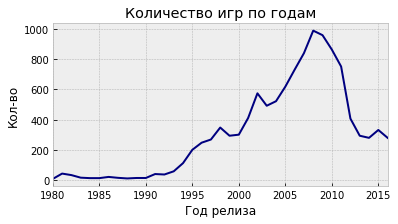

In [28]:
plt.style.use('bmh')

(
    games_per_year
        .plot(figsize=(6, 3), colormap='jet', legend=False, title='Количество игр по годам')
        .set(xlabel='Год релиза', ylabel='Кол-во')
)

plt.show()

Если предположить, что объем игрового рынка не был таким массовым до выхода консолей типа Sony PlayStation и широкого распространения персональных компьютеров, то нас не будут интересовать данные до середины девяностых. Да и мало кто хочет играть в старые игры, разве что настольгирующие хипстеры. Поэтому можем ограничиться десятилетним промежутком.

### Как менялись продажи по платформам

In [29]:
# Глобальные продажи по платформам
def total_sales_per_platform_for(df):
    return (
        df
            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
            .sort_values('total_sales', ascending=False)
    )

In [30]:
# Столбчатая диаграмма глобальных продаж
def bar_plot(df):
    (
        df
            .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
            .set(xlabel='Платформа', ylabel='Глобальные продажи')
    )
    plt.show()

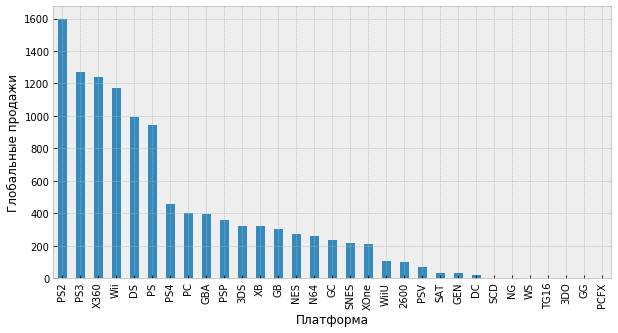

In [31]:
bar_plot(total_sales_per_platform_for(games))

Выберем платформы с наибольшими глобальными продажами, например, первые 5 из списка выше и построим распределение по годам.

In [32]:
top5 = total_sales_per_platform_for(games).head(5)
top5

,total_sales
platform,
PS2,1595.06
PS3,1269.94
X360,1242.18
Wii,1169.72
DS,995.01


In [33]:
def yearly_total_sales_by_platform(name, df):
    '''
    Глобальные продажи по платформе по годам
    '''
    
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

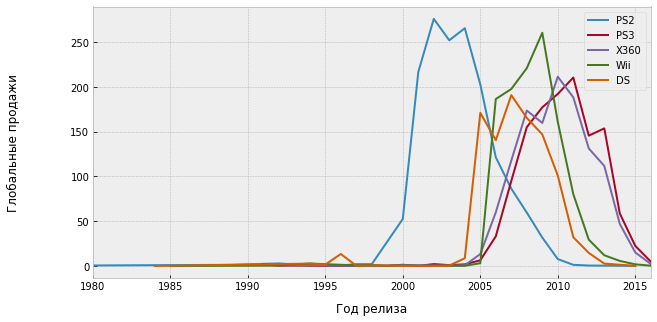

In [34]:
# Линейный график глобальных продаж по платформе по годам
for platform in list(top5.index):
    yearly_total_sales_by_platform(platform, games)['total_sales'].plot(figsize=(10, 5), label=platform)
    plt.xlabel("Год релиза", labelpad=10)
    plt.ylabel("Глобальные продажи", labelpad=50)
    plt.legend()

📝 Примерно за **10 лет** появляются новые и исчезают старые платформы. Таким образом, мы еще раз убедились, что данные за все периоды нам не понадобятся – достаточно определить _актуальный период в 10 лет_ и смотреть на игры на современных платформах.

In [35]:
actual_years = (games['year_of_release'] > 2006) & (games['year_of_release'] <= 2016)
actual_games = games.loc[actual_years]

### Какие платформы лидируют по продажам, растут или падают

Глобальные продажи за актуальный период:

In [36]:
total_sales = total_sales_per_platform_for(actual_games)

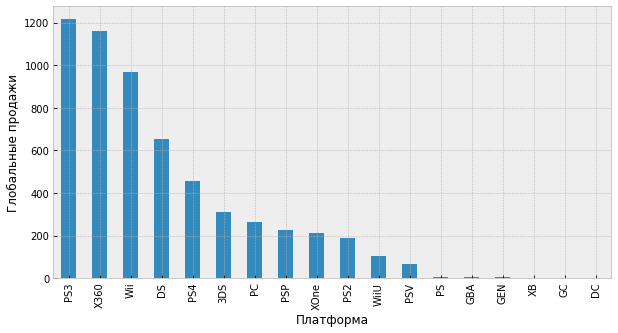

In [37]:
bar_plot(total_sales)

☝🏻 _какие платформы лидируют по продажам_

Какие из них растут или падают?

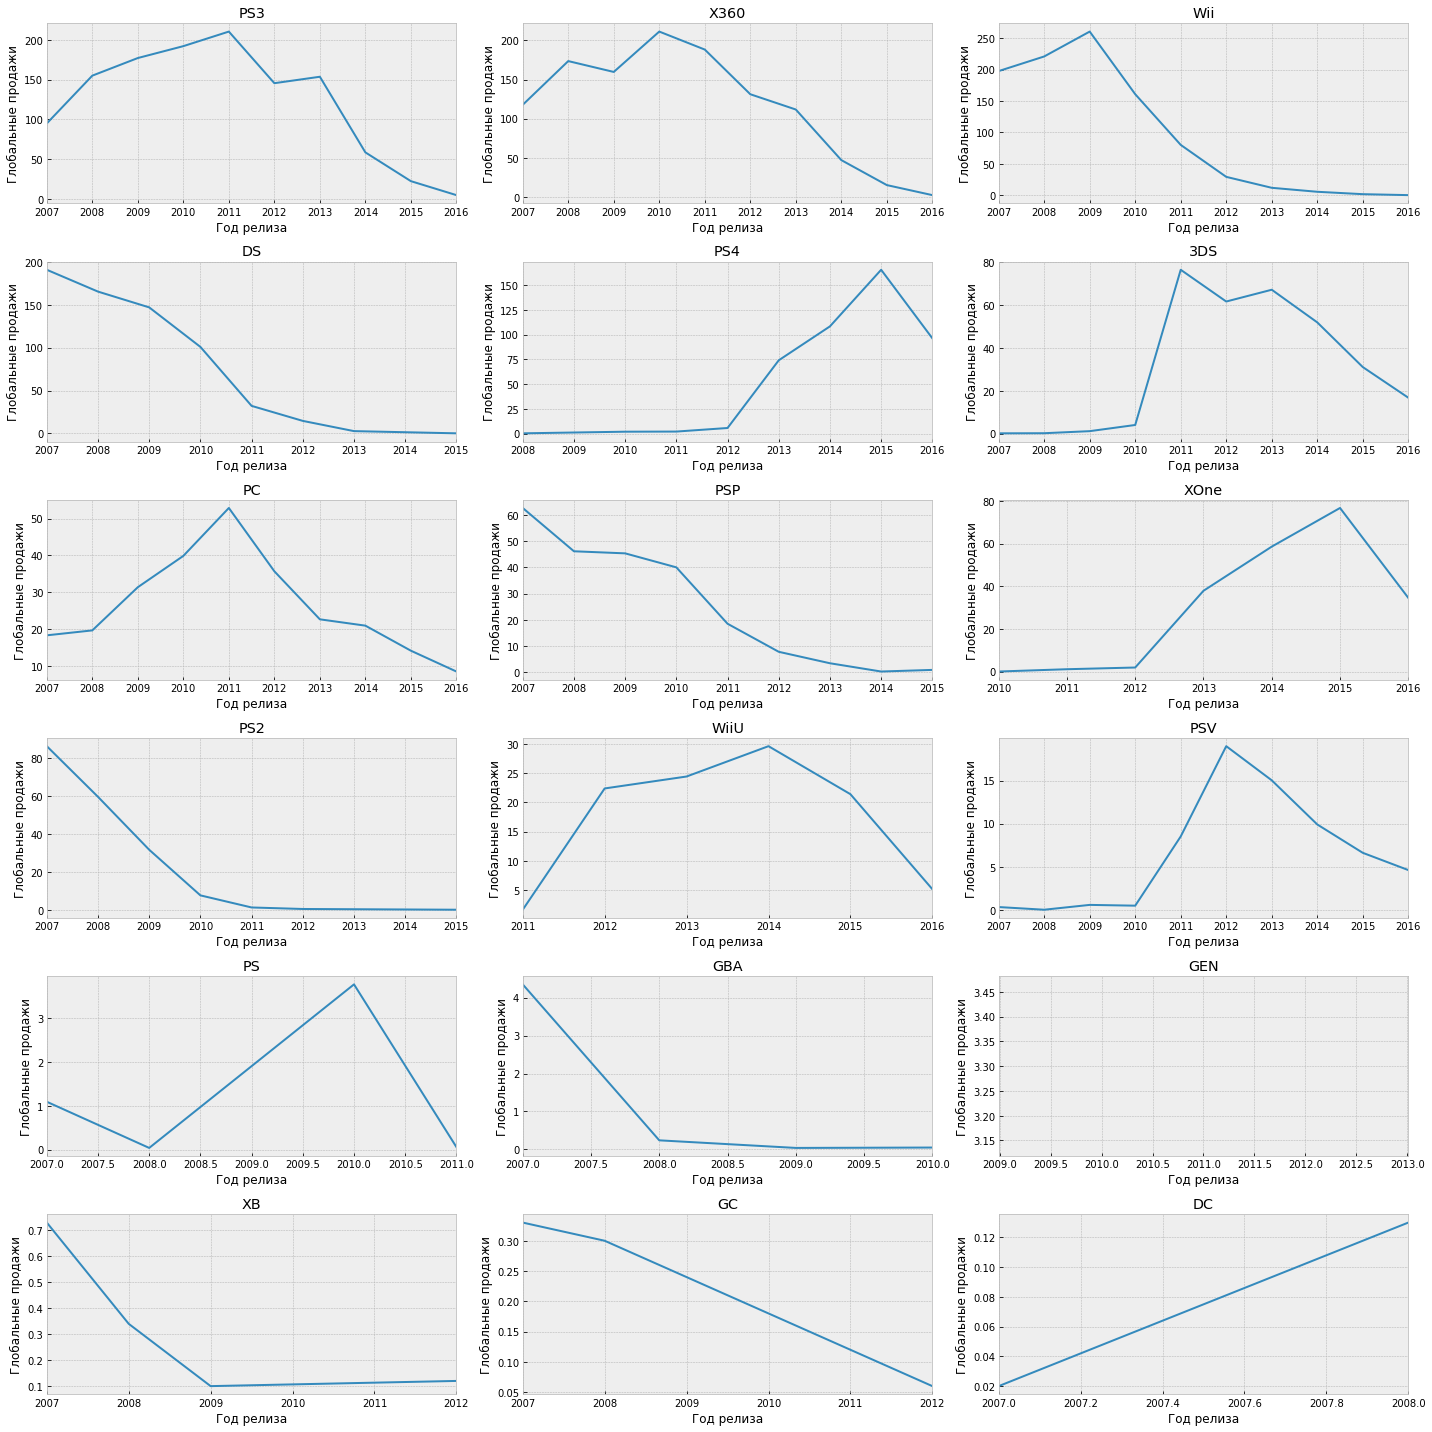

In [38]:
import warnings
warnings.filterwarnings('ignore')

# список платформ за актуальный период
platforms = list(total_sales.index)

# график из 6 строк
rows = 6
cols = (len(platforms) // rows)
fig, ax = plt.subplots(rows, cols)

# построение графиков продаж по каждой платформе
num = 0
for row in range(rows):
    for col in range(cols):
        platform = platforms[num]
        (
            yearly_total_sales_by_platform(platform, actual_games)['total_sales']
                .plot(ax=ax[row, col], figsize=(20, 20), title=platform)
                .set(xlabel='Год релиза', ylabel='Глобальные продажи')
        )
        num += 1

plt.tight_layout()
plt.show()

По графикам видим, что несмотря на лидирующие продажи за актуальный период, эра большинства платформ подходит к концу и продажи значительно падают. Из перспективных – консоли нового поколения:

* PS4: ~100 млн.
* XOne: ~40 млн.

Из портативных только 3DS от Nintendo _пока еще_ держится в топе по продажам за 2016 год (около 20 млн).

Объем продаж компьютерных игр с каждым годом все меньше.

📝 **Рассмотрим детальнее платформы от Sony и Microsoft.**

### «Ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

Среднее значение глобальных продаж игр для PS4: 56.82250000000003
Среднее значение глобальных продаж игр для XOne: 30.114285714285717


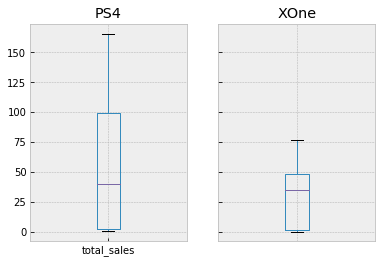

In [39]:
promising_platforms = ['PS4', 'XOne']

fig, axs = plt.subplots(1, 2, sharey=True)

# построение графиков продаж по каждой платформе
for num, platform in enumerate(promising_platforms):
    df = yearly_total_sales_by_platform(platform, actual_games)
    print(f"Среднее значение глобальных продаж игр для {platform}: {df['total_sales'].mean()}")
    df.boxplot('total_sales', ax=axs[num])
    axs[num].set_title(platform)

plt.tick_params(labelcolor='none', bottom='off')
plt.subplots_adjust(left=0.1)
plt.show()

📝 Сумма глобальных продаж игр для PS4 примерно в 2 раза больше чем у Xbox One.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [40]:
ps4 = actual_games.query("platform == 'PS4'")
xone = actual_games.query("platform == 'XOne'")

In [41]:
features = ['user_score', 'critic_score', 'total_sales']
ps4[features].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.558747,-0.038210
critic_score,0.558747,1.000000,0.390762
total_sales,-0.038210,0.390762,1.000000


In [42]:
xone[features].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.061181
critic_score,0.472462,1.000000,0.417843
total_sales,-0.061181,0.417843,1.000000


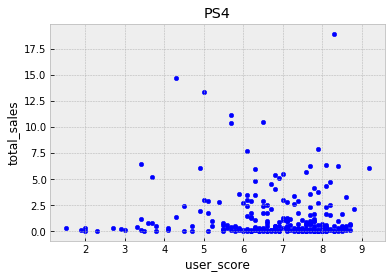

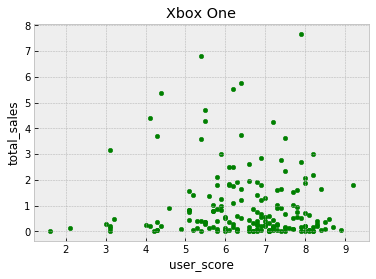

In [43]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='user_score', y='total_sales', kind='scatter', title='Xbox One', color='green')
plt.show()

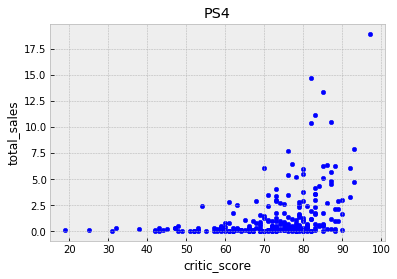

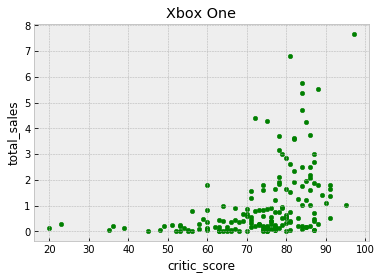

In [44]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='critic_score', y='total_sales', kind='scatter', title='Xbox One', color='green')
plt.show()

📝 Выводы:
    
* Взаимосвязи между отзывами пользователей и продажами нет;
* Взаимосвязь между отзывами критиков и продажами существует, однако не слишком большая;
* Взаимосязь между отзывами критиков и отзывами пользователей существует, чуть большая чем между отзывами критиков и продажами.

Корреляция не говорит о причинно-следственной связи. И хотя по диаграммам рассеяния видим, что чем выше оценки критиков, тем выше продажи игр на обоих платформах, мы не можем утверждать, что высокие оценки критиками приводят к высоким продажам игр, а при покупке игры пользователи больше доверяют критикам, а не коллегам по геймерскому цеху.

### Распределение игр по жанрам

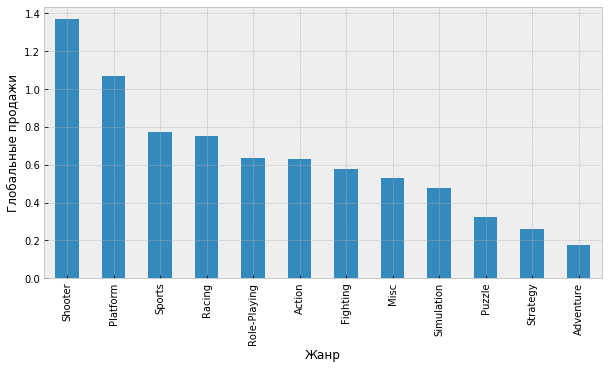

In [45]:
(actual_games
    .pivot_table(index='genre', values='total_sales')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

📝 Самыми популярными жанрами ожидаемо являются шутеры, платформеры, а также спортивные игры. Хуже всего продаются стратегии и квесты. Но стоит учитывать региональные продажи, т.к., например, в Японии картина по жанрам может быть совсем другой.

## 4. Портрет пользователя каждого региона

### NA / North America

In [46]:
plt.style.use('seaborn')

In [47]:
region = 'na_sales'

In [48]:
def top5_in_region(column):
    return (
        actual_games
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(5)
    )

In [49]:
def sales_pie_by_region(df):
    (
        df
            .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(10, 5), legend=False)
            .set(ylabel='Продажи')
    )
    plt.show()

#### Самые популярные платформы (топ-5)

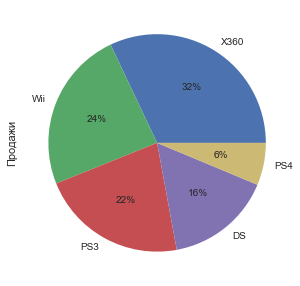

In [50]:
sales_pie_by_region(top5_in_region('platform'))

📝 В США более популярна XBox – Microsoft старается удержаться на родном рынке. Даже Wii немного обходит консоль Sony по продажам.

#### Самые популярные жанры (топ-5)

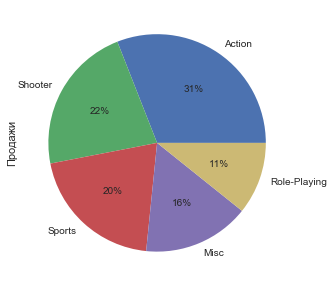

In [51]:
sales_pie_by_region(top5_in_region('genre'))

📝 Экшены и шутеры – самые популярные жанры.

#### Влияет ли рейтинг ESRB на продажи

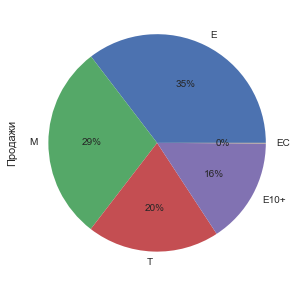

In [52]:
sales_pie_by_region(top5_in_region('rating'))

📝 Большая доля игр приходится на игры, подходящие для детей, и только 29% продаж на игры для взрослой аудитории (17+)

### EU / Europe

In [53]:
region = 'eu_sales'

#### Самые популярные платформы (топ-5)

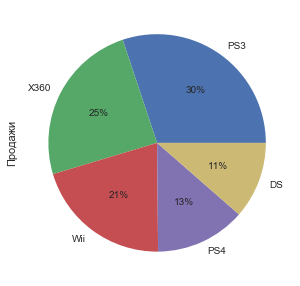

In [54]:
sales_pie_by_region(top5_in_region('platform'))

📝 В Европе более популярна PlayStation, Microsoft в догонящих. Присутствие Wii в Старом Свете еще меньше, чем в США.

#### Самые популярные жанры (топ-5)

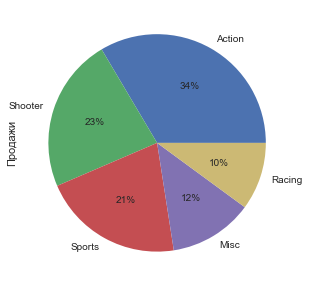

In [55]:
sales_pie_by_region(top5_in_region('genre'))

📝 Экшены и шутеры – все также самые популярные жанры. Надежда на Японию.

#### Влияет ли рейтинг ESRB на продажи

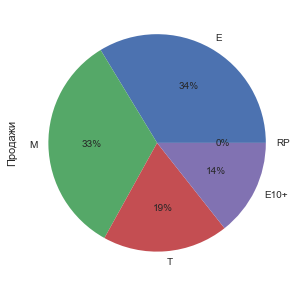

In [56]:
sales_pie_by_region(top5_in_region('rating'))

📝 В Европе лучше продаются игры для взрослой аудитории: 35% продаж вместо 29%.

### JP / Japan

In [57]:
region = 'jp_sales'

#### Самые популярные платформы (топ-5)

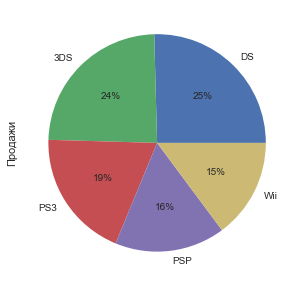

In [58]:
sales_pie_by_region(top5_in_region('platform'))

📝 В Японии картина продаж кардинально меняется. Японцы много играют на портативных консолях типа Nintento (3)DS, PSP и пр. Здесь мы практически не видим присутствия Xbox в пятерке лидеров.

#### Самые популярные жанры (топ-5)

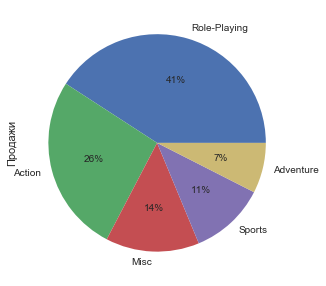

In [59]:
sales_pie_by_region(top5_in_region('genre'))

📝 Ролевые игры (JRPG) – самые популярные. О Final Fantasy слышали многие и за пределами Японии, но в целом JRPG – явление довольно уникальное. К слову, экшены отстают по продажам примерно в полтора раза.

#### Влияет ли рейтинг ESRB на продажи

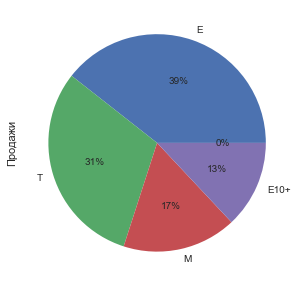

In [60]:
sales_pie_by_region(top5_in_region('rating'))

📝 В Японии хуже всего продаются игры для взрослой аудитории – всего 17% продаж.

## 5. Проверка гипотез

Для каждой из приведенных ниже гипотез проверим две (двусторонние) гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Чтобы понять, различаются ли пользовательские рейтинги и значима ли разница между средними значениями, проведем статистические тесты.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Мы рассматриваем две генеральные сопокупности – игры на разных платформах.

Нулевая гипотеза H₀:

> Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**.

Исходя из H₀ формулируем альтернативную гипотезу H₁:

> Средние пользовательские рейтинги платформ Xbox One и PC **различаются**.

_Пороговое значение alpha (критический уровень статистической значимости) зададим равным 2.5%._ На это есть 2 причины:

1. Большое количество пропусков в датасете.
2. Microsoft в последнее время активно развивает геймерские возможности в Windows.

In [61]:
alpha = .025

In [62]:
pc = actual_games.query("platform == 'PC'")

results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var=False,  # Welch’s t-test, который не предполагает равенство дисперсий
    nan_policy='omit' # игнорируем пропуски
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.029951657643345574
Не получилось отвергнуть нулевую гипотезу


In [63]:
pc['user_score'].mean()

6.770790378006873

In [64]:
xone['user_score'].mean()

6.508839779005524

p-value получили равным ~3%. Если бы рейтинги пользователей НЕ отличались (наша нулевая гипотеза), то те различия, что мы фактически видим, могли бы получиться случайно лишь в 3% случаев. Это весьма маленькая вероятность. Таким образом, различия довольно высокие для предположения равенства рейтингов. Но так как мы задали жесткий уровень значимости (0.025), то говорим, что тем не менее не будем отклонять гипотезу, но со стандартным уровнем в 0.05 мы бы ее уже отвергли.

Гипотеза `Средние пользовательские рейтинги платформ Xbox One и PC одинаковые` **подтвердилась**.

### Средние пользовательские рейтинги жанров Action и Sports разные

Мы рассматриваем две генеральные сопокупности – игры разных жанров.

Нулевая гипотеза H₀:

> Средние пользовательские рейтинги жанров Action и Sports **одинаковые**.

Исходя из H₀ формулируем альтернативную гипотезу H₁:

> Средние пользовательские рейтинги жанров Action и Sports **различаются**.

_Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%._

In [65]:
alpha = .05

In [66]:
action = actual_games.query("genre == 'Action'")
sports = actual_games.query("genre == 'Sports'")

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    nan_policy='omit' # игнорируем пропуски
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.648261415089771e-12
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги различаются, и практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится.

Гипотеза `Средние пользовательские рейтинги жанров Action и Sports разные` **подтвердилась**.

## 6. Общий вывод

Тезисы:

* Платформы появляются и умирают в течение 10 лет.
* Наиболее популярные на данный момент платформы – это Sony PlayStation 4 и Xbox One. Они появились пару лет назад и имеют потенциал роста.
* В США и Европе лучше всего продаются шутеры и экшены.
* Япония – отдельный рынок с уклоном в портативные консоли и ролевые игры.
* Больше всего продаж приходятся на игры, разрешенные для детей.

Обе сформулированные гипотезы подтвердились:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action и Sports разные.

---

💡 Стоит помнить, что у каждой консоли есть эксклюзивы, из-за которых покупают ту или иную консоль. Кроме того, есть мультиплатформенные блокбастеры с огромными продажами, которые могут сделать определенный жанр в среднем прибыльным. При желании можно убрать подобные "выбросы" и посмотреть на выборочные совокупности без них.